# Climate Change Charts Scrapping Project

[International Energy Agency website](https://www.iea.org/policies) has charts library consisting of approximately 5 thousand charts related to such topics as climate change, energy security, energy efficiency, energy access, energy consumption, emissions, investments in energy sector etc.

Task: to create code able to download charts related to any topic you may be interested in. For the purpose of this task, let it be climate change.

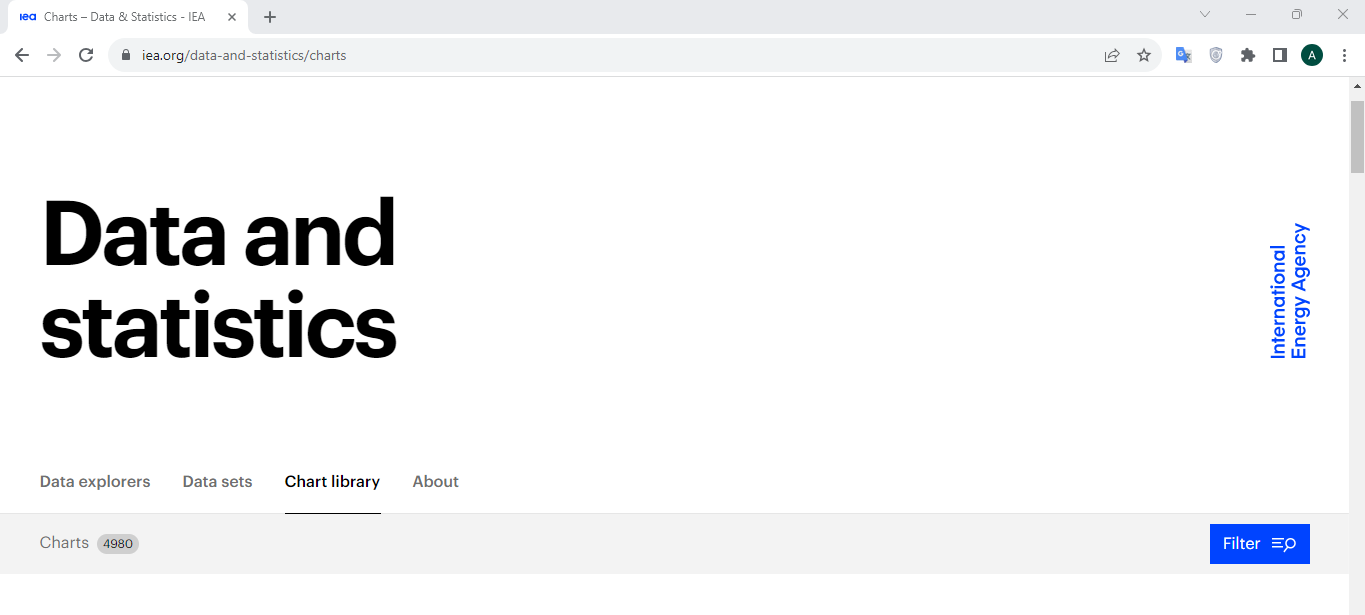

For this task I use **Selenium** in order to enable my code imitate user's actions in browser necessary for downloading charts.

I start by importing some necessary libraries.

In [1]:
from selenium import webdriver
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import ElementClickInterceptedException
import time
import os

Below I create variables for some paths to be used in webdriver initialization in the next step. 

In [2]:
my_current_folder = os.getcwd()
my_download_folder = os.mkdir('charts')
path_to_my_download_folder = os.path.abspath('charts')

Then I initialize webdriver which will imitate user's actions in browser. I checked the version of my Chrome browser (117.0.5938.92), downloaded chromedriver compatible with the browser version (download link can be found [here](https://googlechromelabs.github.io/chrome-for-testing/) and saved it in my working directory. 

In [3]:
path_to_webdriver = os.path.join(my_current_folder,'chromedriver.exe')
service = webdriver.chrome.service.Service(executable_path=path_to_webdriver)
options = webdriver.ChromeOptions()
prefs = {'download.default_directory' : r'{}'.format(path_to_my_download_folder)}
options.add_experimental_option('prefs', prefs)
driver = webdriver.Chrome(service=service,options=options)
driver.maximize_window()
wait = WebDriverWait(driver,10)

Now I need to indicate URL of the first page and make webdriver go to it. I selected topic Climate Change in Filter. There are 273 charts related to this topic. These charts are presented on 23 pages (each page contains maximum of 12 charts). 

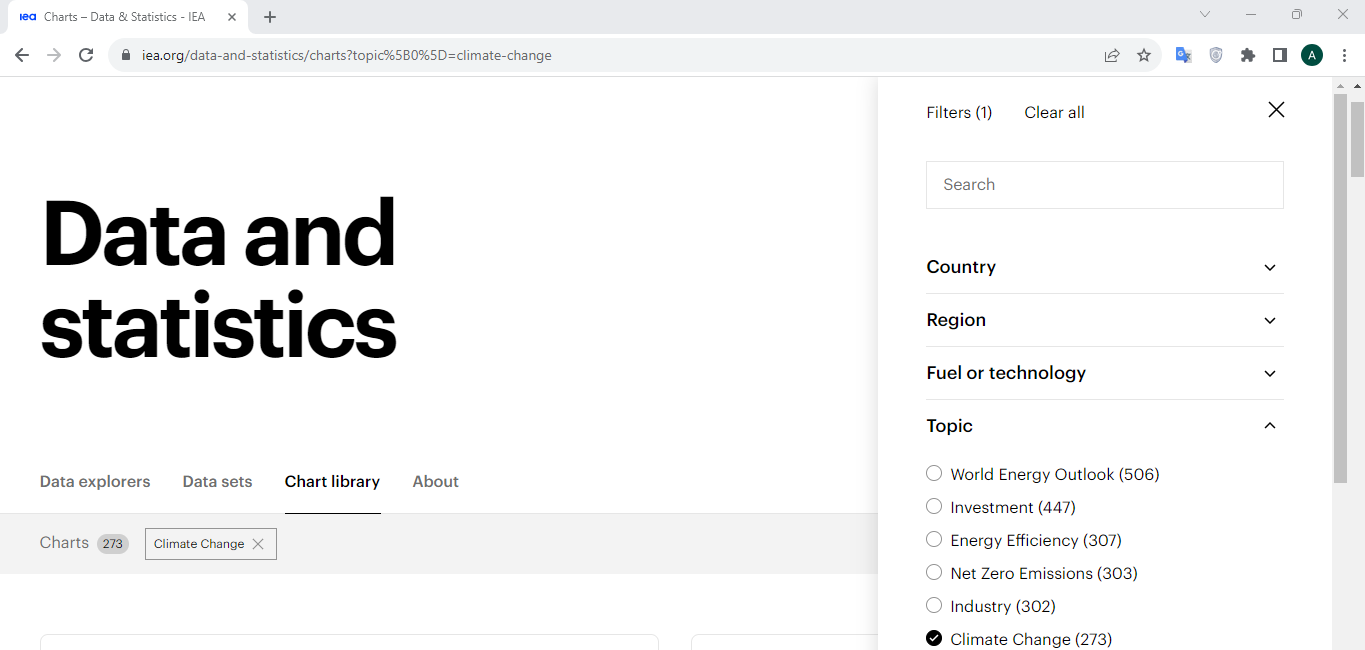

In [4]:
current_page_fixed = 'https://www.iea.org/data-and-statistics/charts?topic%5B0%5D=climate-change&page='
current_page_variable = '1'
current_page = current_page_fixed + current_page_variable
driver.get(current_page)

Before proceeding with scraping I have to create a function able to retry clicking certain element until successful click is made. The necessity of such function can be explained by pages loading speed. Some pages are fully loaded not instantly, but with some time lag. That means that some elements on such pages are not clickable instantly because they may be overlapped (obscured) by other elements. And that may cause ElementClickInterceptedException. So retry function can solve this problem.

In [5]:
def retry_click (button_name):
    successful_click = False
    while not successful_click:
        try:
            button_name.click()
            successful_click = True
        except ElementClickInterceptedException:
            continue

Now I'm ready to proceed with the code scraping the charts I need. 

In [6]:
start_time = time.time()

# Define number of pages with charts
number_of_pages = int(driver.find_elements(By.CLASS_NAME,'m-pagination-page__link')[-1].text)

# Create outer loop iterating over all pages with charts
for page_number in range(1,number_of_pages+1):
    
    # Find all links to charts
    links_to_charts = driver.find_elements(By.CLASS_NAME,'a-link-icon--oneliner')
    
    # Gather all links to charts into list
    list_of_links_to_charts = []
    for link in links_to_charts:
        list_of_links_to_charts.append(link.get_attribute('href'))
        
    # Create inner loop iterating over all charts on certain page
    for url in list_of_links_to_charts:
        
        # Open chart
        driver.get(str(url))
        
        # Click the button 'Download chart' at the page loaded
        download_chart_button = wait.until(EC.element_to_be_clickable((By.XPATH,'//*[@id="content"]/section/div/div/a/span[1]')))
        retry_click(download_chart_button)
        
        # Short sleep between 2 clicks enables code to work smoothly
        time.sleep(3)
        
        # Choose format for chart download by clicking 'Download chart as image'. The chart will be downloaded as .png image.
        download_chart_as_image_button = wait.until(EC.element_to_be_clickable((By.XPATH,'//*[@id="content"]/div[3]/div/div[2]/ul/li[1]/a/div[1]/span[2]')))
        retry_click(download_chart_as_image_button)
        
        # In order to prevent too-many-requests error, I have to add a short sleep
        time.sleep(3)
    
    # Check whether current page is the last one. If yes, break the loop. If no, click the button 'Next'
    if page_number == number_of_pages:
        break
    else:
        driver.get(current_page_fixed + str(page_number+1))
        
        # In order to prevent too-many-requests error, I have to add a short sleep
        time.sleep(5)
    
print(f'Code was executed in {(time.time()-start_time):.0f} seconds')

Code was executed in 2483 seconds


Finally, I assure that all 273 charts were downloaded to the folder 'charts' in my working directory.

In [7]:
print(f'{len(os.listdir(path_to_my_download_folder))} images were downloaded.')

273 images were downloaded.


Ok, the task is completed. Let's close browser. Thank you for attention.

In [8]:
driver.quit()

**Credit**: IEA 2023; Data and statistics, Chart library, https://www.iea.org/data-and-statistics/charts?topic%5B0%5D=climate-change, License: CC BY 4.0